In [1]:
import sqlite3
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Connect to the SQLite database
conn = sqlite3.connect('european_database.sqlite')

In [3]:
# Define the metrics to compare
metrics_to_compare = ['WinPercentage', 'AverageGoalsScored']

In [4]:
cursor = conn.cursor()

# Execute an SQL query to join the 'matchs' and 'divisions' tables to retrieve relevant data
cursor.execute('''
SELECT
    d.country AS Country,
    m.HomeTeam AS Team,
    AVG(CASE WHEN m.FTR = 'H' THEN 3 WHEN m.FTR = 'D' THEN 1 ELSE 0 END) AS AveragePoints,
    AVG(m.FTHG) AS AverageGoalsScored,
    AVG(m.FTAG) AS AverageGoalsConceded
FROM
    matchs AS m
JOIN
    divisions AS d
ON
    m.Div = d.division
GROUP BY
    d.country, m.HomeTeam
ORDER BY
    Country, Team
''')

# Fetch the results
results = cursor.fetchall()

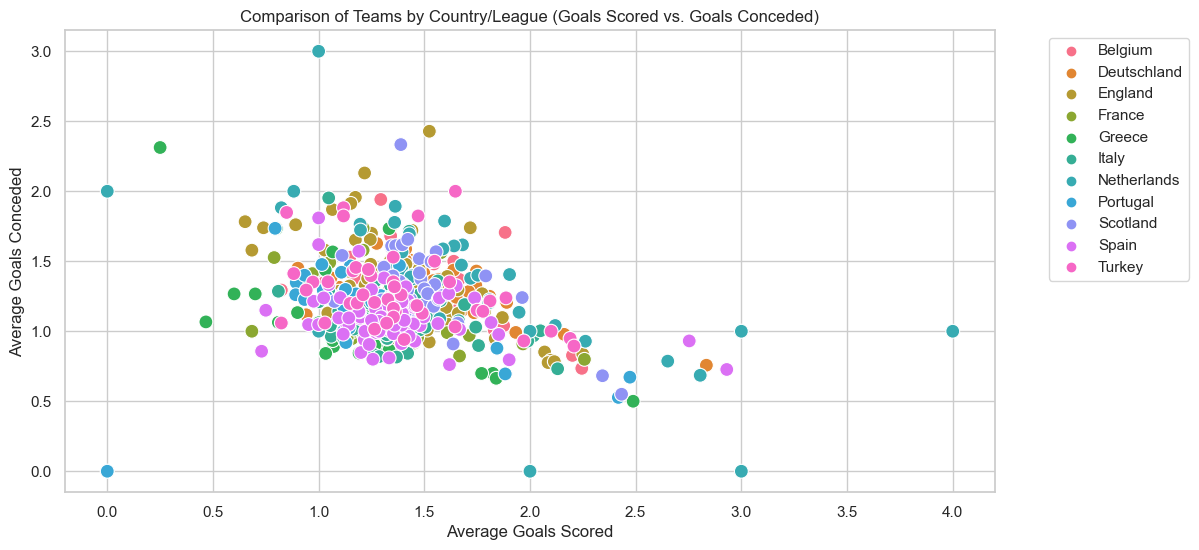

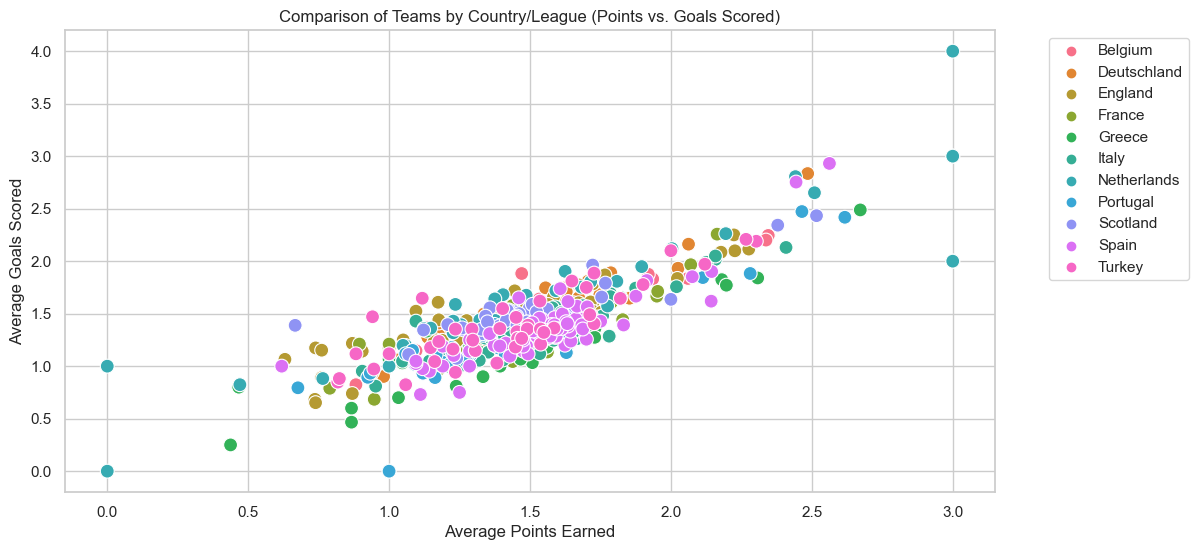

In [5]:
# Convert the results to a pandas DataFrame for easier manipulation and visualization
df = pd.DataFrame(results, columns=['Country', 'Team', 'AveragePoints', 'AverageGoalsScored', 'AverageGoalsConceded'])

# Plot the data using seaborn
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")
sns.scatterplot(data=df, x='AverageGoalsScored', y='AverageGoalsConceded', hue='Country', s=100)
plt.xlabel('Average Goals Scored')
plt.ylabel('Average Goals Conceded')
plt.title('Comparison of Teams by Country/League (Goals Scored vs. Goals Conceded)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")
sns.scatterplot(data=df, x='AveragePoints', y='AverageGoalsScored', hue='Country', s=100)
plt.xlabel('Average Points Earned')
plt.ylabel('Average Goals Scored')
plt.title('Comparison of Teams by Country/League (Points vs. Goals Scored)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [6]:
# Execute an SQL query to join the 'matchs' and 'divisions' tables to retrieve relevant data
cursor.execute('''
SELECT
    d.country AS Country,
    d.name AS League,
    COUNT(*) AS TotalMatches,
    AVG(ABS(FTHG - FTAG)) AS AverageGoalDifference,
    AVG(CASE WHEN FTR = 'D' THEN 1 ELSE 0 END) AS DrawPercentage
FROM
    matchs AS m
JOIN
    divisions AS d
ON
    m.Div = d.division
GROUP BY
    d.country, d.name
ORDER BY
    Country, League
''')

# Fetch the results
results = cursor.fetchall()

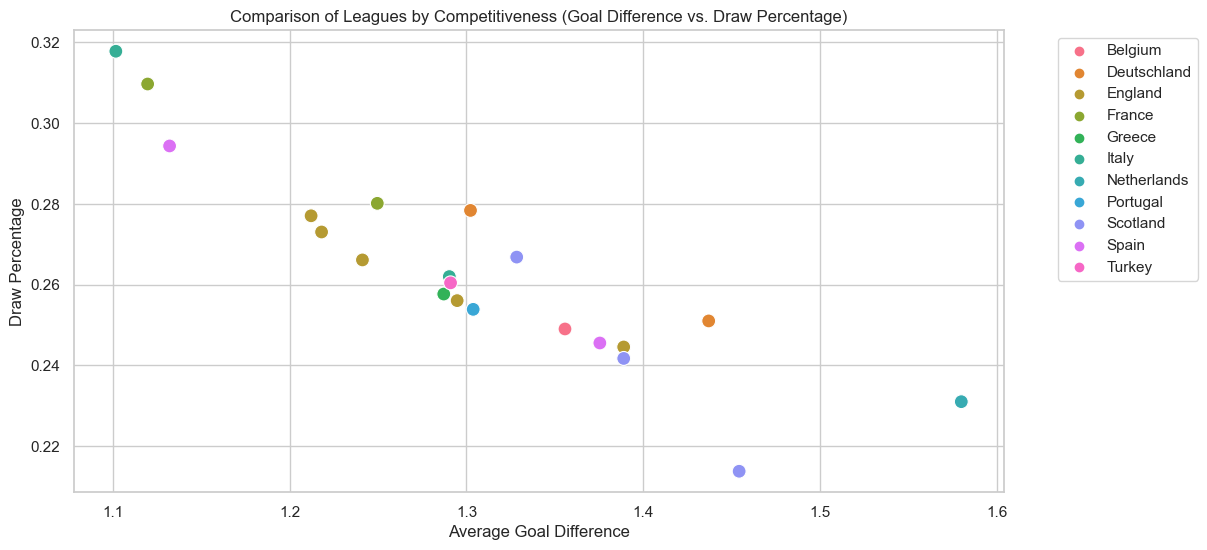

In [7]:
# Convert the results to a pandas DataFrame for easier manipulation and visualization
df = pd.DataFrame(results, columns=['Country', 'League', 'TotalMatches', 'AverageGoalDifference', 'DrawPercentage'])

# Plot the data using seaborn
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")
sns.scatterplot(data=df, x='AverageGoalDifference', y='DrawPercentage', hue='Country', s=100)
plt.xlabel('Average Goal Difference')
plt.ylabel('Draw Percentage')
plt.title('Comparison of Leagues by Competitiveness (Goal Difference vs. Draw Percentage)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [8]:
# Close the database connection
conn.close()